In [1]:
import numpy as np
import matplotlib.pyplot as plt
from statG import Gauss
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [68]:

gauss = Gauss()
gauss.create_sample(20,0,0.5)


(array([3., 0., 2., 2., 4., 4., 3., 1., 0., 1.]),
 array([-0.89615385, -0.68269062, -0.46922739, -0.25576415, -0.04230092,
         0.17116232,  0.38462555,  0.59808879,  0.81155202,  1.02501526,
         1.23847849]),
 <a list of 10 Patch objects>)

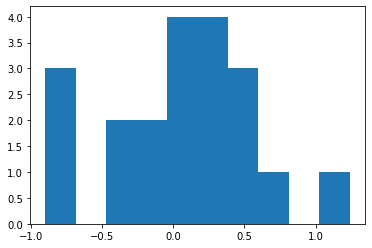

In [49]:

plt.hist(gauss.get_sample(),bins=10 )

In [69]:

gauss.sign_test(0)

0.8993239639244482

In [20]:

gauss.wilcoxon_test(0)

0.9955518861166486

In [40]:

res_sign = []
res_sign2 = []
res_wilcoxon = []
res_wilcoxon2 = []
mus = np.arange(0,2,0.1)
sigmas = np.arange(0.5,2,0.1)
for mu in np.arange(0,2,0.1):
    res_sign2.append([])
    res_wilcoxon2.append([])
    for sigma in np.arange(0.5,2,0.1):
        positive_sign = 0
        positive_wilcoxon = 0
        cicles = 10000
        for i in range(cicles):
            gauss.create_sample(20,mu,sigma)
            positive_sign += gauss.sign_test(0)
            positive_wilcoxon += gauss.wilcoxon_test(0)
        res_sign.append([mu,sigma,positive_sign/cicles])
        res_sign2[-1].append(positive_sign/cicles)
        res_wilcoxon2[-1].append(positive_wilcoxon/cicles)


In [41]:

res_sign = res_sign2
res_wilcoxon = res_wilcoxon2
res_sign2 = np.matrix(res_sign2)
res_wilcoxon2 = np.matrix(res_wilcoxon2)

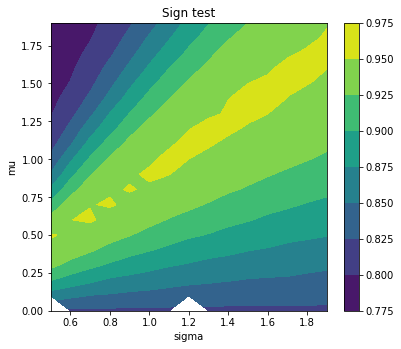

In [47]:

fig = plt.figure(figsize=(6,5))
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes([left, bottom, width, height]) 
cp = plt.contourf(sigmas,mus,res_sign2)
plt.colorbar(cp)
ax.set_xlabel('sigma')
ax.set_ylabel('mu')
ax.set_title('Sign test')
plt.show()

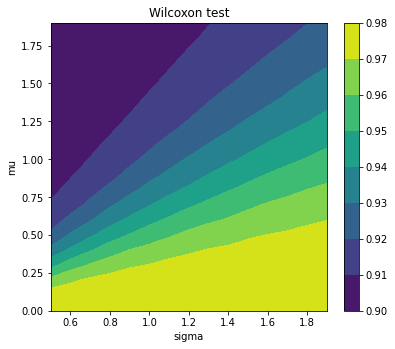

In [43]:
fig = plt.figure(figsize=(6,5))
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes([left, bottom, width, height]) 
cp = plt.contourf(sigmas,mus,res_wilcoxon2)
plt.colorbar(cp)
ax.set_xlabel('sigma')
ax.set_ylabel('mu')
ax.set_title('Wilcoxon test')
plt.show()

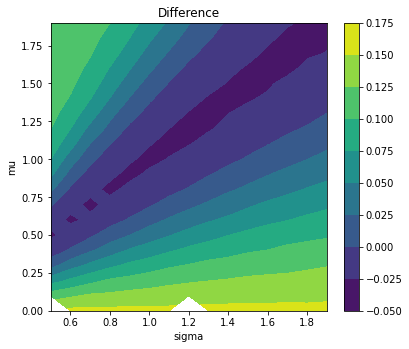

In [46]:

fig = plt.figure(figsize=(6,5))
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes([left, bottom, width, height]) 
cp = plt.contourf(sigmas,mus,res_wilcoxon2-res_sign2)
plt.colorbar(cp)
ax.set_xlabel('sigma')
ax.set_ylabel('mu')
ax.set_title('Difference')
plt.show()